In [9]:
import pickle
with open('./data/LunarLander-normal_64_source_both_reward_normalize.pkl', 'rb') as f:
    normal_epoch_reward_normalize = pickle.load(f)
    normal_epoch_reward_normalize = normal_epoch_reward_normalize[:len(normal_epoch_reward_normalize)//2]
with open('./data/LunarLander-noisy_64_source_both_reward_normalize.pkl', 'rb') as f:
    noisy_epoch_reward_normalize = pickle.load(f)
    noisy_epoch_reward_normalize = noisy_epoch_reward_normalize[:len(noisy_epoch_reward_normalize)//2]
with open('./data/LunarLander-normal_64_source_both.pkl', 'rb') as f:
    normal_epoch_reward_unnormalize = pickle.load(f)
    normal_epoch_reward_unnormalize = normal_epoch_reward_unnormalize[:len(normal_epoch_reward_unnormalize)//2]
with open('./data/LunarLander-noisy_64_source_both.pkl', 'rb') as f:
    noisy_epoch_reward_unnormalize = pickle.load(f)
    noisy_epoch_reward_unnormalize = noisy_epoch_reward_unnormalize[:len(noisy_epoch_reward_unnormalize)//2]

In [10]:
def smooth(epoch_reward, epochs = 1000, steps_per_epoch = 4000, epoch_smooth=10):
    smooth_return = []
    for i in range(epochs):
        if (i+epoch_smooth>epochs):
            smooth_return.append(sum(epoch_reward[i:])/(epochs-i))
        else:
            smooth_return.append(sum(epoch_reward[i:i+epoch_smooth])/epoch_smooth)
    return smooth_return

Text(0, 0.5, 'Average Trajectory Return')

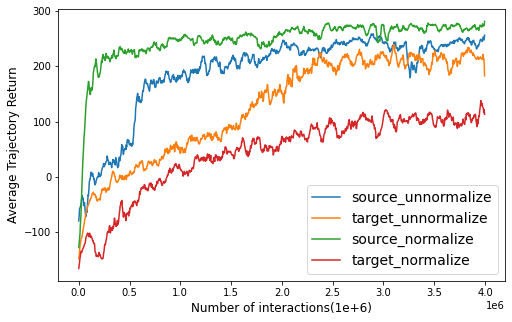

In [11]:
import matplotlib.pyplot as plt
import numpy as np
epochs = 1000
steps_per_epoch = 4000
n_interactions = [(i*steps_per_epoch) for i in range(epochs)]
plt.figure(figsize=(8,5))
plt.plot(n_interactions, smooth(normal_epoch_reward_unnormalize, epochs, steps_per_epoch), label='source_unnormalize')
plt.plot(n_interactions, smooth(noisy_epoch_reward_unnormalize, epochs,  steps_per_epoch), label='target_unnormalize')
plt.plot(n_interactions, smooth(normal_epoch_reward_normalize, epochs, steps_per_epoch), label='source_normalize')
plt.plot(n_interactions, smooth(noisy_epoch_reward_normalize, epochs, steps_per_epoch), label='target_normalize')
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Number of interactions(1e+6)", fontsize=12)
plt.ylabel("Average Trajectory Return", fontsize=12)
#plt.savefig('./plot/Single_Task_LunarLander_Source_vs_Target.png')

In [12]:
with open('./data/LunarLander-noisy_64_target_1.0_obs.pkl', 'rb') as f:
    epoch_reward_target_1 = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_3.0_obs.pkl', 'rb') as f:
    epoch_reward_target_3 = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_5.0_obs.pkl', 'rb') as f:
    epoch_reward_target_5 = pickle.load(f)

In [13]:
with open('./data/LunarLander-noisy_64_target_0.01_both.pkl', 'rb') as f:
    epoch_reward_target_both_1 = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_0.1_both.pkl', 'rb') as f:
    epoch_reward_target_both_2 = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_1.0_both.pkl', 'rb') as f:
    epoch_reward_target_1_both = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_3.0_both.pkl', 'rb') as f:
    epoch_reward_target_3_both = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_5.0_both.pkl', 'rb') as f:
    epoch_reward_target_5_both = pickle.load(f)

In [14]:
with open('./data/LunarLander-noisy_64_target_0.01_both_reward_normalize.pkl', 'rb') as f:
    epoch_reward_target_both = pickle.load(f)
with open('./data/LunarLander-noisy_64_target_3.0_obs_reward_normalize.pkl', 'rb') as f:
    epoch_reward_target_normalize = pickle.load(f)

Text(0, 0.5, 'Average Trajectory Return')

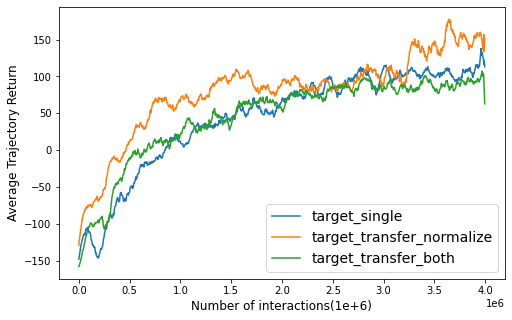

In [16]:
plt.figure(figsize=(8,5))
plt.plot(n_interactions, smooth(noisy_epoch_reward_normalize, epoch_smooth=20), label='target_single')
plt.plot(n_interactions, smooth(epoch_reward_target_normalize, epoch_smooth=20), label='target_transfer_normalize')
plt.plot(n_interactions, smooth(epoch_reward_target_both, epoch_smooth=20), label='target_transfer_both')
#plt.plot(n_interactions, smooth(epoch_reward_target_both_1, epoch_smooth=20), label='target_transfer_0.01_both')
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Number of interactions(1e+6)", fontsize=12)
plt.ylabel("Average Trajectory Return", fontsize=12)
#plt.savefig('./plot/Single_Task_LunarLander_Source_vs_Target.png')